# Linear Regression

Vamos a intentar predecir a que hora va a pasasar el omnibus en base a la distancia a la que se encuentra.

La regresion lineal es un modelo que asume una relacion linear entre la variable de entrada x _(x := distance)_ y la variable de salida y _(y := time)_. Como tenemos solo una variable de entrada estamos hablando de una **regresion lineal simple**

### Importamos las librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

### Cargamos el dataset

In [2]:
data = pd.read_csv('../data/dataset.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed,matrix_position
0,76,217,-56.222400,-34.855885,2018-10-02 14:38:53,-56.222717,-34.855766,2018-10-02 14:39:23,31.807877,30.0,1.060263,"[8, 4]"
1,76,217,-56.222717,-34.855766,2018-10-02 14:39:23,-56.222733,-34.855780,2018-10-02 14:39:53,2.134200,30.0,0.071140,"[8, 4]"
2,76,217,-56.222733,-34.855780,2018-10-02 14:39:53,-56.222916,-34.855682,2018-10-02 14:40:08,19.939152,15.0,1.329277,"[8, 4]"
3,76,217,-56.222916,-34.855682,2018-10-02 14:40:08,-56.222866,-34.855682,2018-10-02 14:40:23,4.562295,15.0,0.304153,"[8, 4]"
4,76,217,-56.222866,-34.855682,2018-10-02 14:40:23,-56.222850,-34.855667,2018-10-02 14:40:38,2.216614,15.0,0.147774,"[8, 4]"


Para esto solo vamos a utilizar la distancia, velocidad y el tiempo

### Eliminamos los atributos que no vamos a utilizar

In [3]:
data = data.drop(['id','line','longitude','latitude','timestamp','next_longitude','next_latitude','next_timestamp','matrix_position'], axis=1)
#'speed',

In [4]:
data.head()

,distance,time,speed
0,31.807877,30.0,1.060263
1,2.134200,30.0,0.071140
2,19.939152,15.0,1.329277
3,4.562295,15.0,0.304153
4,2.216614,15.0,0.147774


### Outliers

In [5]:
data.describe()

,distance,time,speed
count,95309.000000,95309.000000,95309.000000
mean,78.054427,18.816555,4.436328
std,67.659143,18.080407,3.580679
min,0.000000,-15.000000,0.000000
25%,23.574429,15.000000,1.405627
50%,64.729828,15.000000,3.784293
75%,114.577660,15.000000,6.705276
max,499.572301,1816.000000,24.982543


Podemos ver que tenemos tiempos negativos

In [6]:
data.query('time < 0')

,distance,time,speed
17518,0.0,-15.0,-0.0


Es un solo dato, lo eliminamos

In [7]:
data = data.query('time >= 0 & time <= 100')

### Ahora vamos a comprobar que existe una relacion lineal entre la distancia y el tiempo (deberia de ser obvio).

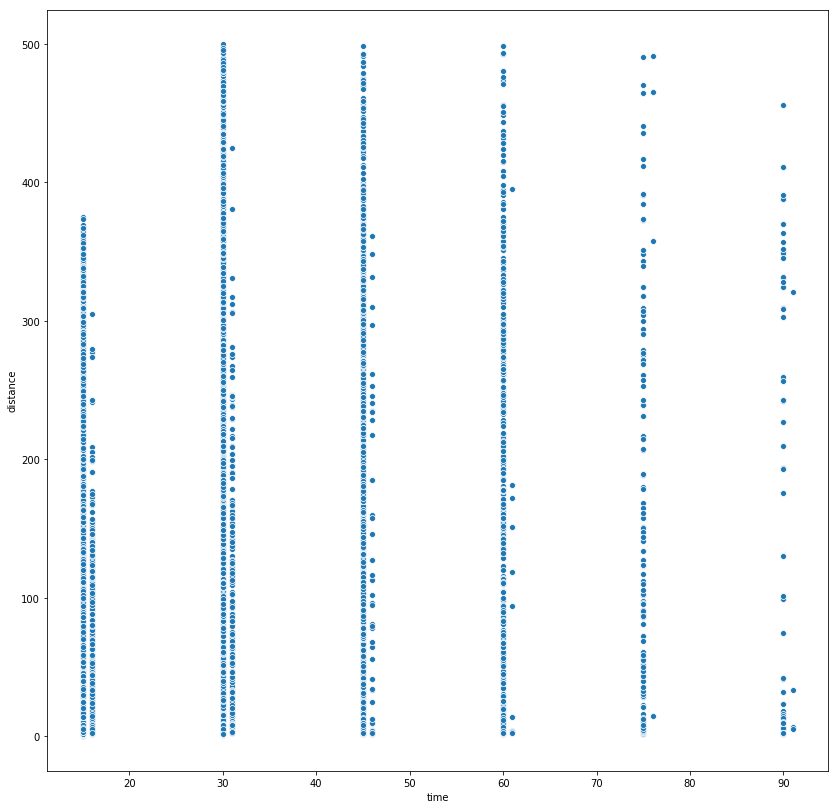

In [72]:
matplotlib.rcParams['figure.figsize'] = [14,14]
sns.scatterplot(x=data.time, y=data.distance)

Nos encontramos con el primer problema, parece los datos no siguen una relacion linea, esto se debe a la alta variacion interclase, vamos a intentar separarlos por linea.

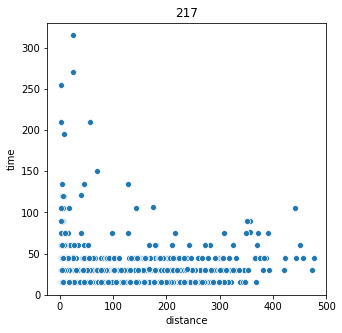

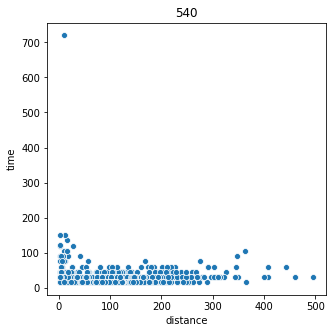

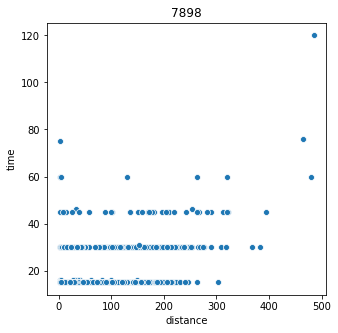

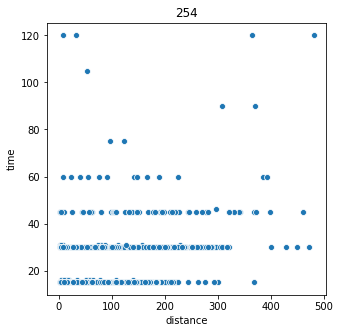

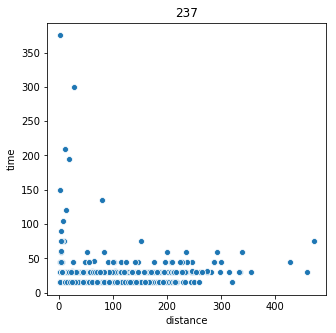

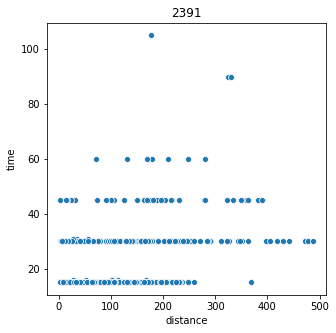

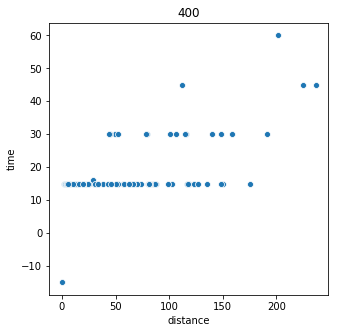

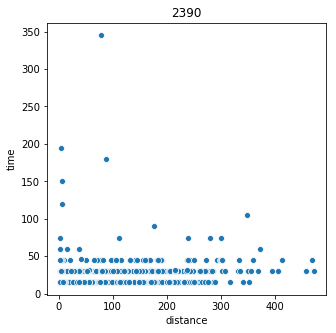

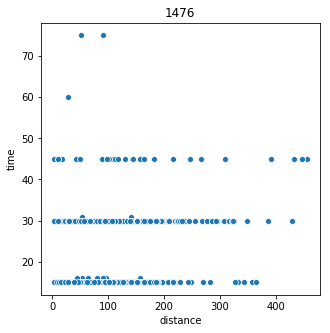

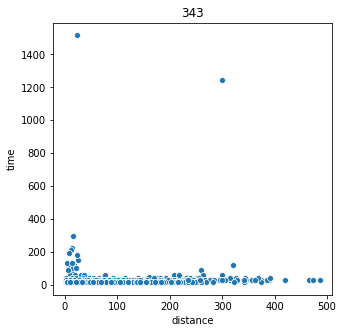

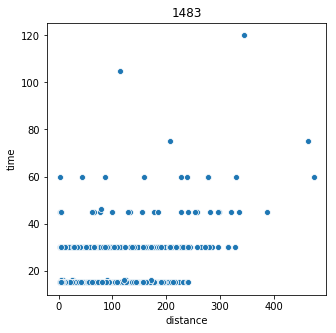

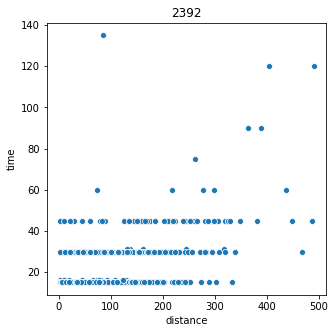

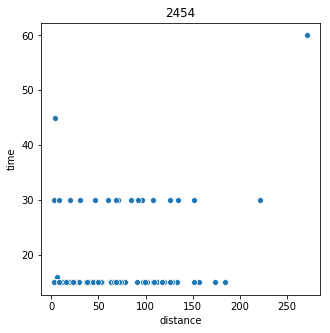

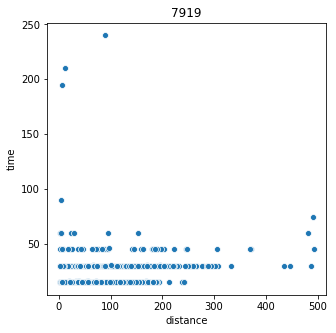

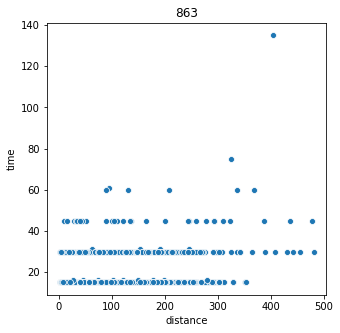

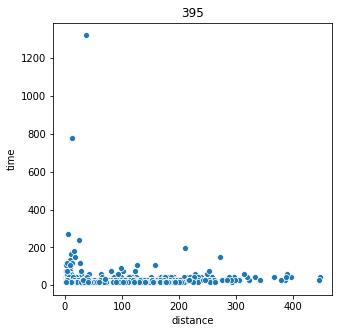

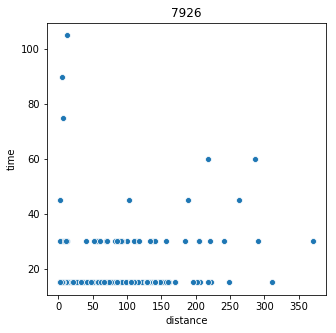

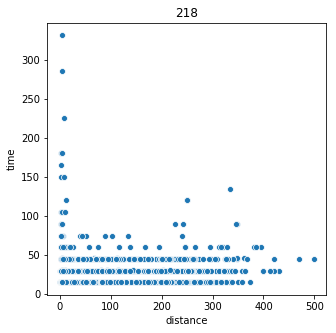

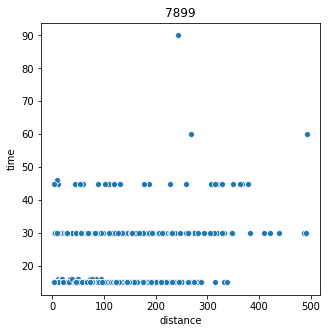

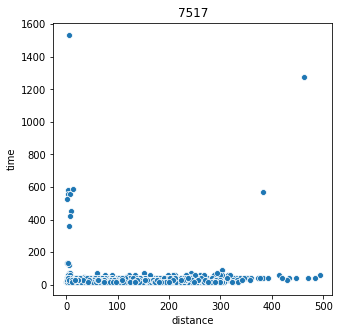

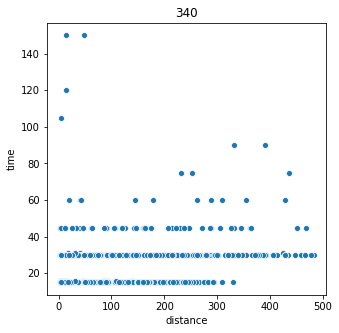

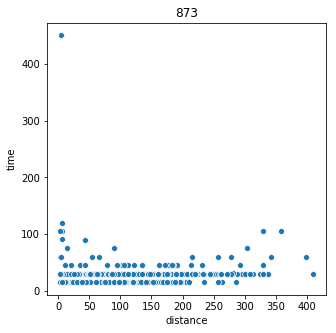

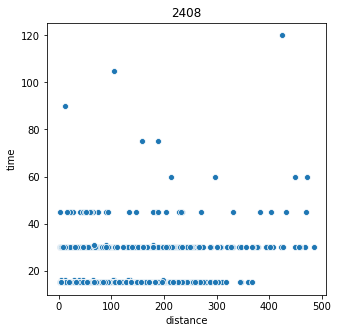

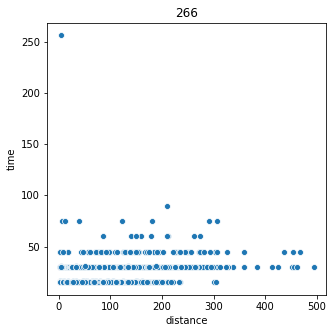

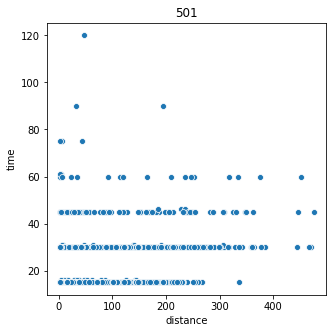

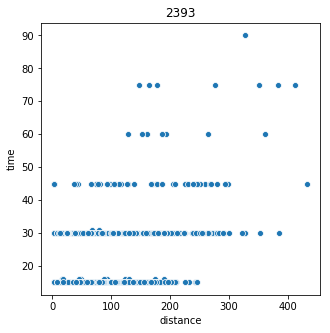

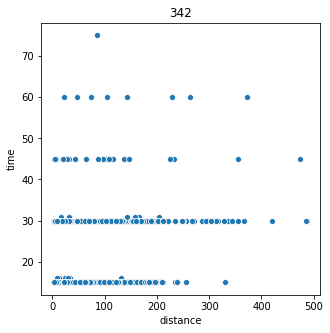

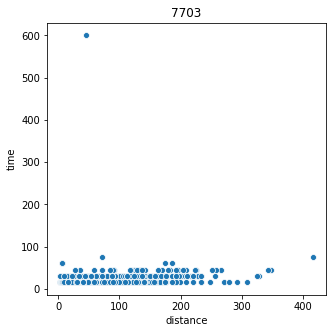

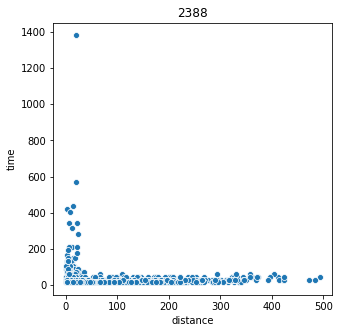

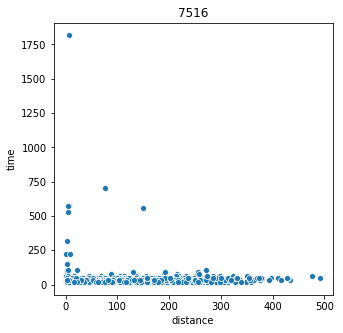

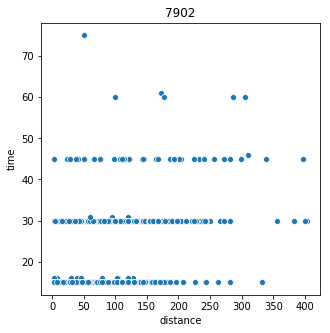

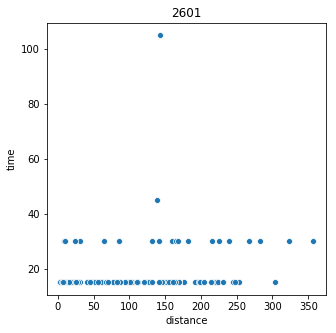

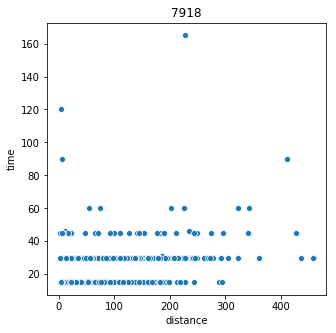

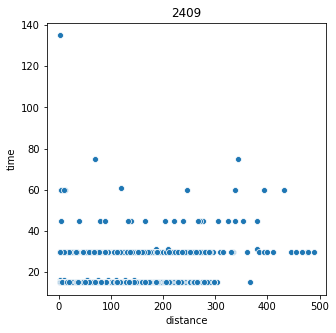

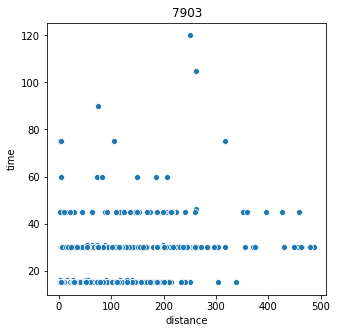

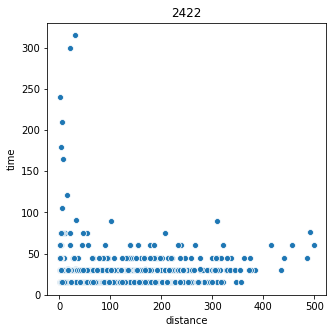

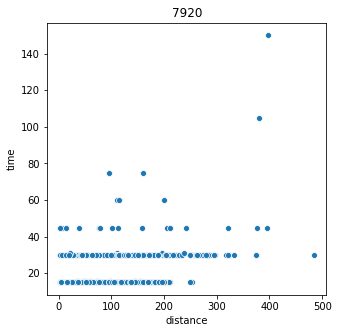

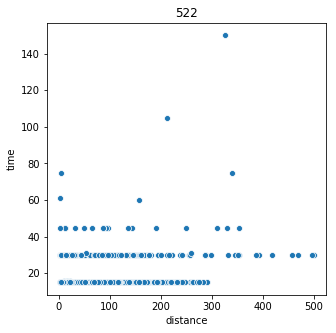

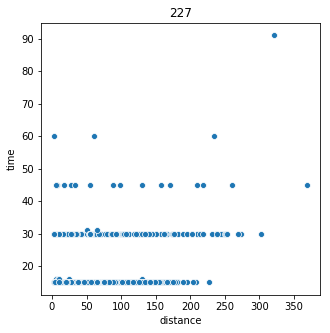

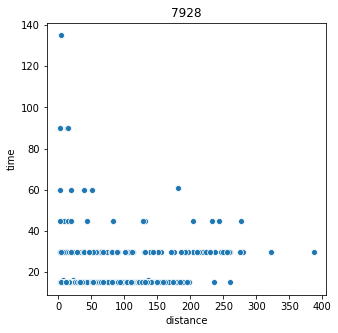

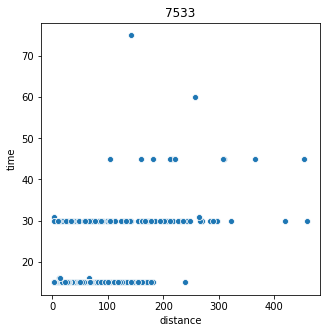

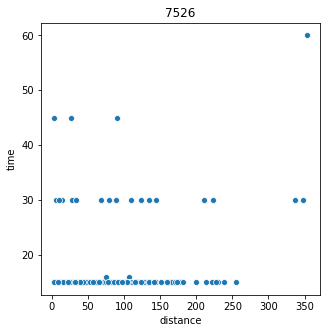

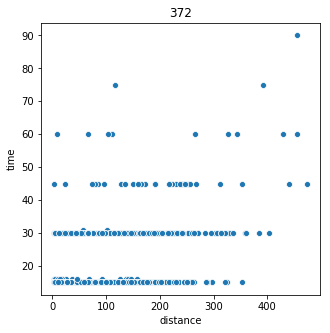

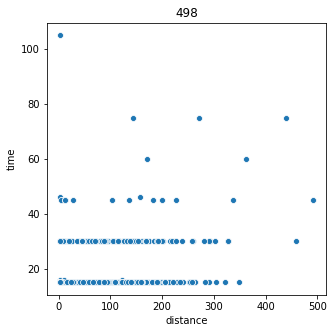

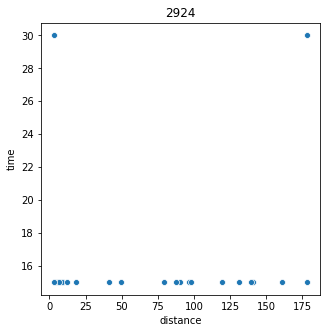

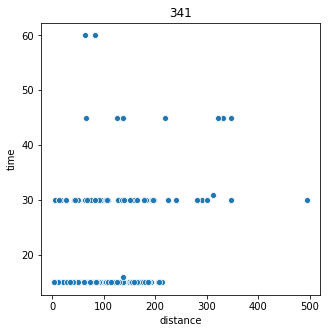

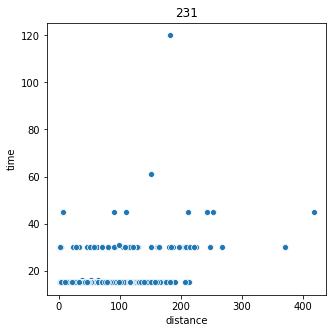

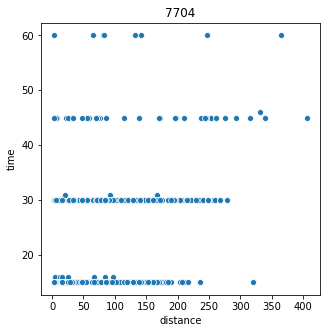

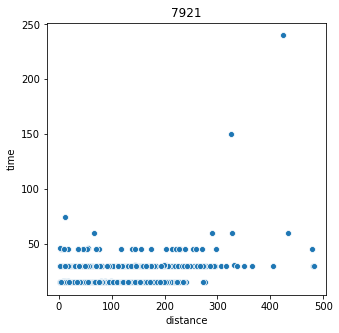

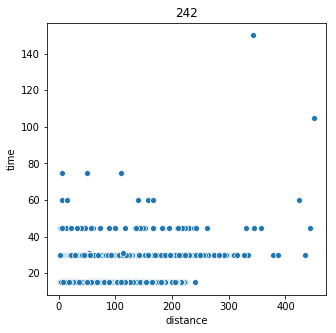

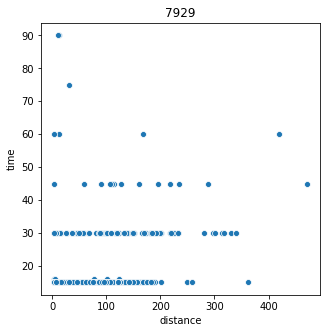

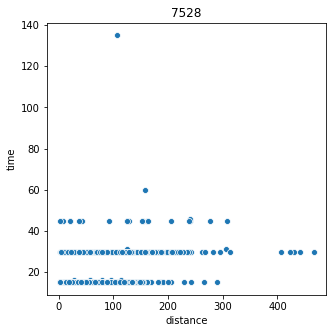

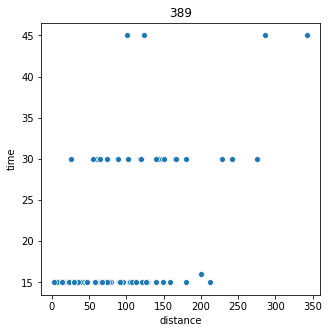

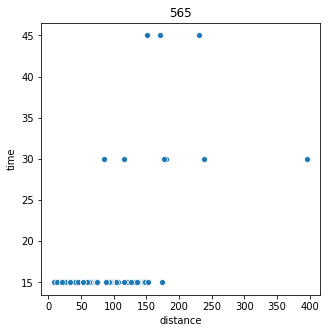

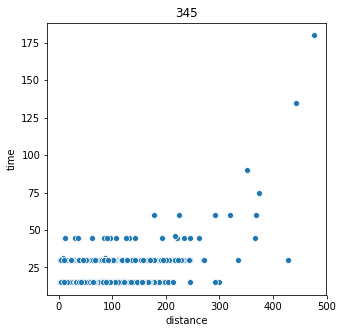

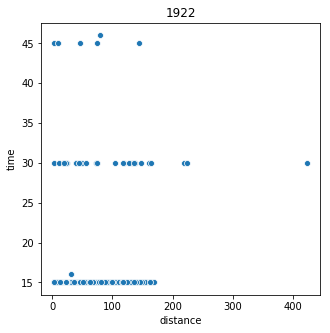

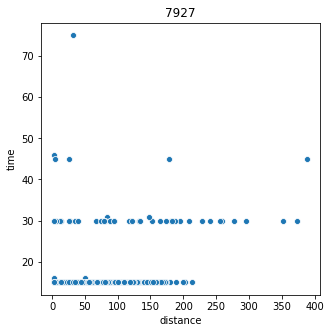

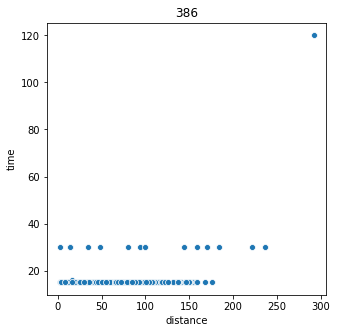

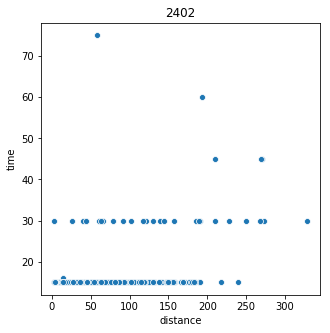

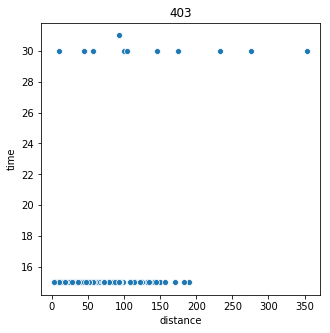

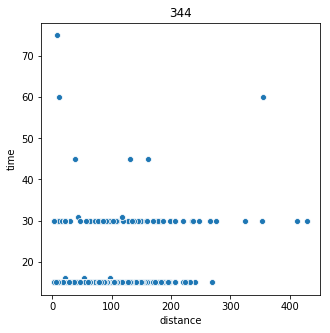

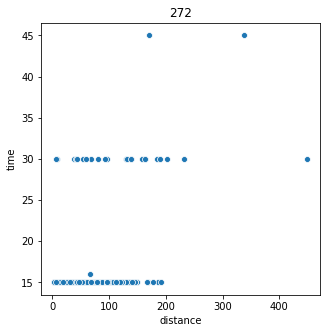

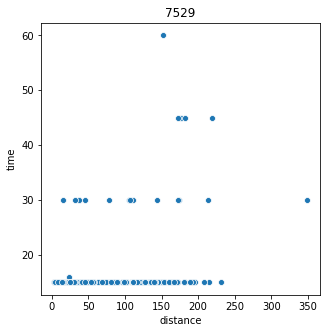

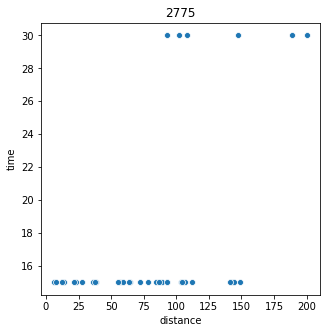

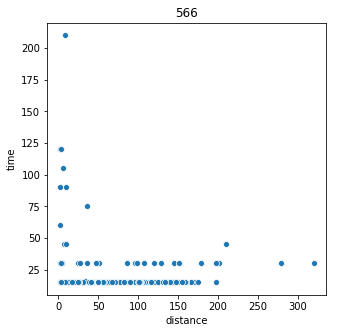

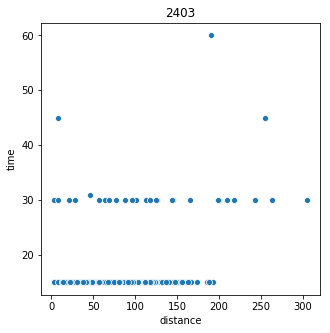

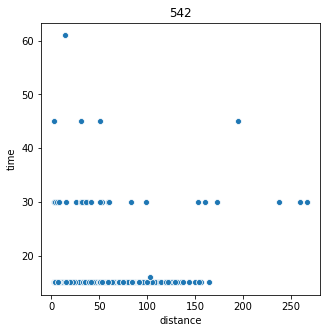

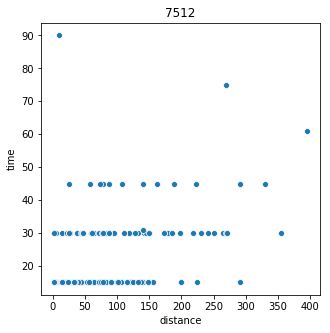

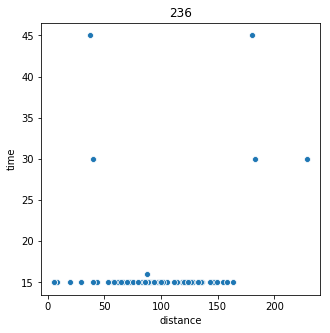

In [15]:
data = pd.read_csv('../data/dataset.csv')
data = data.drop(['Unnamed: 0'], axis=1)
lines = data.line.unique()

matplotlib.rcParams['figure.figsize'] = [5,5]
for line in lines:
    dd = data.query('line == {0}'.format(line))
    plt.title(str(line))
    sns.scatterplot(x=dd.distance, y=dd.time)
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [45]:
d= data.query('line == 345')
d.id.unique()

array([551, 709,  77,  29, 907, 750, 950])

0.1296406874963345

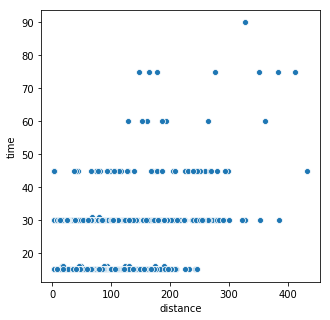

In [59]:
from sklearn.linear_model import LinearRegression

d= data.query('line == 2393')
# d = d.query('time < 40')
d.id.unique()
X, y = d.distance.values.reshape(-1, 1), d.time.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
sns.scatterplot(x=d.distance, y=d.time)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

Linear Assumption. Linear regression assumes that the relationship between your input
and output is linear. It does not support anything else. This may be obvious, but it is
good to remember when you have a lot of attributes. You may need to transform data to
make the relationship linear (e.g. log transform for an exponential relationship).
 Remove Noise. Linear regression assumes that your input and output variables are
not noisy. Consider using data cleaning operations that let you better expose and clarify
the signal in your data. This is most important for the output variable and you want to
remove outliers in the output variable (y) if possible.
 Remove Collinearity. Linear regression will over-fit your data when you have highly
correlated input variables. Consider calculating pairwise correlations for your input data
and removing the most correlated.
 Gaussian Distributions. Linear regression will make more reliable predictions if your
input and output variables have a Gaussian distribution. You may get some benefit using
transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian
looking.
 Rescale Inputs: Linear regression will often make more reliable predictions if you rescale
input variables using standardization or normalization.

Vamos a eliminar los outliers ya que el ruido afecta mucho a la regresion lineal, tampoco estamos usando la velocidad ya que valores con alta correlacion causan overfitting en los datos